In [ ]:
#librairies
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#lecture dataset
dfr=pd.read_csv("dataset_jeux_par_item V2.csv")
dfr.head(5)

,jeu,Genre,nom_plateforme,nom_fabricant,editeur,developpeur,annee,ttl_sales,dev_country,metacritic_summary,...,igdb_age_rating_category,igdb_age_rating_class,igdb_developer_name,igdb_developer_country,igdb_publisher_name,igdb_publisher_country,igdb_websites_category,igdb_websites_url,twitch_id,twitch_streams_count
0,Wii Sports,Sports,Wii,Nintendo,Nintendo,NINTENDO,2006.0,82.90,Japan,Tennis (1-4 players): Players grab the control...,...,"ESRB, PEGI, CLASS_IND, CERO, USK, GRAC, ACB","ESRB_E, PEGI_7, CLASS_IND_10, CERO_B, USK_12, ...",Nintendo EAD Software Development Group No.2,Japan,Nintendo,Japan,"official, wikipedia, wikia, twitch","http://wiisports.nintendo.com/, https://en.wik...",12232.0,1.0
1,Mario Kart 8 Deluxe,Racing,Nintendo Switch,Nintendo,Nintendo,NINTENDO,2017.0,48.41,Japan,Race and battle your friends in the definitive...,...,"ESRB, PEGI, USK, CLASS_IND, CERO, GRAC, ACB","ESRB_E, PEGI_3, USK_0, CLASS_IND_10, CERO_A, G...",Nintendo EPD,Japan,"Nintendo of America, Nintendo of Europe","United States of America, Germany","wikia, wikipedia, official, twitch, reddit","https://www.mariowiki.com/Mario_Kart_8_Deluxe,...",941530474.0,670.0
2,Super Mario Bros.,Platform,Nintendo (NES),Nintendo,Nintendo,NINTENDO,1985.0,40.24,Japan,NaN,...,"ESRB, PEGI, CLASS_IND, CERO, USK, GRAC, ACB","ESRB_E, PEGI_3, CLASS_IND_10, CERO_A, USK_0, G...","Nintendo, Nintendo EAD, Nintendo R&D4",Japan,Nintendo,Japan,"wikipedia, wikia, twitch, youtube, facebook, t...",https://en.wikipedia.org/wiki/List_of_Game_%26...,509508.0,13.0
3,Animal Crossing: New Horizons,Simulation,Nintendo Switch,Nintendo,Nintendo,NINTENDO,2020.0,40.17,Japan,If the hustle and bustle of modern life’s got ...,...,"ESRB, PEGI, USK, CERO","ESRB_E, PEGI_3, USK_0, CERO_A","Nintendo EPD, Nintendo",Japan,Nintendo,Japan,"official, wikia, wikipedia, twitter, reddit, d...",https://www.nintendo.com/games/detail/animal-c...,509538.0,1655.0
4,Counter-Strike: Global Offensive,Shooter,Microsoft Windows,PC,Valve,VALVE,2012.0,40.00,United States,Counter-Strike: Global Offensive features new ...,...,"ESRB, PEGI, USK, CLASS_IND, ACB","ESRB_M, PEGI_18, USK_18, CLASS_IND_16, ACB_R18","Hidden Path Entertainment, Valve",United States of America,Valve,United States of America,"official, wikia, wikipedia, facebook, youtube,...","http://blog.counter-strike.net/, http://counte...",32399.0,24977.0


In [ ]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20465 entries, 0 to 20464
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   jeu                            20465 non-null  object 
 1   Genre                          20465 non-null  object 
 2   nom_plateforme                 20465 non-null  object 
 3   nom_fabricant                  20465 non-null  object 
 4   editeur                        20465 non-null  object 
 5   developpeur                    20463 non-null  object 
 6   annee                          19647 non-null  float64
 7   ttl_sales                      20465 non-null  float64
 8   dev_country                    20459 non-null  object 
 9   metacritic_summary             9734 non-null   object 
 10  metacritic_user_score          9734 non-null   float64
 11  metacritic_score               9734 non-null   float64
 12  jvc_summmary                   5028 non-null  

In [ ]:
#recherche valeurs manquantes 
dfr.isna().sum()

jeu                                  0
Genre                                0
nom_plateforme                       0
nom_fabricant                        0
editeur                              0
developpeur                          2
annee                              818
ttl_sales                            0
dev_country                          6
metacritic_summary               10731
metacritic_user_score            10731
metacritic_score                 10731
jvc_summmary                     15437
jvc_user_score                   17213
jvc_url                          15298
mixed_user_score                 10318
igdb_id                           5515
igdb_category                     5515
igdb_follows                     11282
igdb_hypes                       18784
igdb_franchise                   18414
igdb_platforms                    6036
igdb_genres                       6334
igdb_game_modes                   7860
igdb_rating                      10699
igdb_summary             

In [ ]:
#Supprimer certaines colonnes dont les informations ne sont influantes pour la modélisation comme les colonnes suivantes : jvc_url, igdb_id, igdb_url, igdb_age_rating_category, igdb_websites_url, txitch_id
#Nettoyage des données avec gestion des données manquantes (méthode Simple Imputer ?)
#Encodage 
#entrainement et modélisation en passant par une tokenisation sur les colonnes summary/age rating class 

In [ ]:
#variable cible : les ventes et voir ce qui influence les ventes
target=dfr.ttl_sales

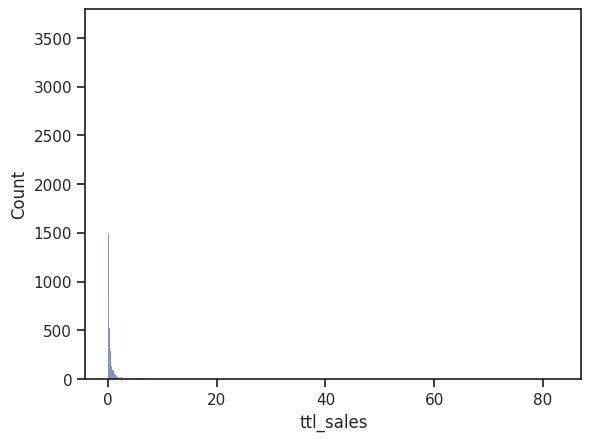

In [ ]:
#distrib de la variable cible 

sns.set_theme(style="ticks")

sns.histplot(target)
plt.show()
#Le montant des ventes n'est pas parlant nous allons regarder ce que donne la distrib du journal des ventes 

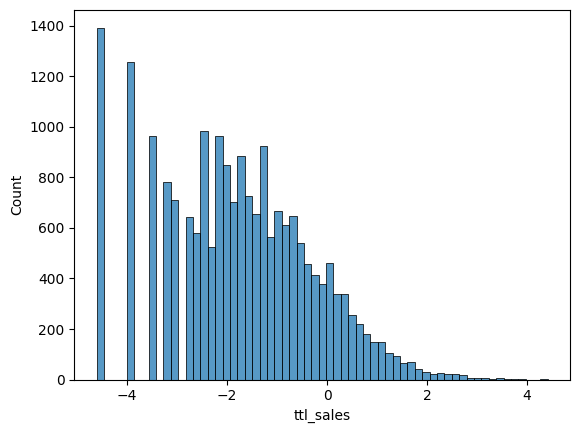

In [ ]:
y = np.log(target)
sns.histplot(y)
plt.show()
#L’histogramme représente la distribution de ventes de jeux vidéos à l’échelle logarithmique.
#Axe horizontal : valeurs de ventes à l’échelle logarithmique
#Axe vertical : fréquence de chaque valeur de ventes.

In [ ]:
#La majorité de jeux vidéos ont des ventes relativement faibles, tandis qu’un petit nombre de jeux vidéos ont des ventes relativement élevées :
# un petit nombre de titres très populaires représente une grande part des ventes totales 

In [ ]:
#calcul de la variance des colonnes numériques du dataset 

for col in dfr.columns:
    # vérifier si la colonne est numérique
    if dfr[col].dtype != 'object':
        # calculer la variance et l'écart type de la colonne
        variance = dfr[col].var()
        std_dev = np.std(dfr[col])
        print(f"Variance de la colonne {col} : {variance}")
        print(f"Ecart-type de la colonne {col} : {std_dev}")

Variance de la colonne annee : 44.43063693243054
Ecart-type de la colonne annee : 6.665461385834846
Variance de la colonne ttl_sales : 3.042609703227655
Ecart-type de la colonne ttl_sales : 1.7442651832243805
Variance de la colonne metacritic_user_score : 1.5209034636881722
Ecart-type de la colonne metacritic_user_score : 1.2331857999445235
Variance de la colonne metacritic_score : 162.00430789066323
Ecart-type de la colonne metacritic_score : 12.727437477842752
Variance de la colonne jvc_user_score : 1.1754855387007421
Ecart-type de la colonne jvc_user_score : 1.0840313986610064
Variance de la colonne mixed_user_score : 1.4469518607003413
Ecart-type de la colonne mixed_user_score : 1.2028338462644343
Variance de la colonne igdb_follows : 9738.910709104204
Ecart-type de la colonne igdb_follows : 98.68054606742604
Variance de la colonne igdb_hypes : 2829.8563935865836
Ecart-type de la colonne igdb_hypes : 53.18056935857753
Variance de la colonne igdb_rating : 165.93930943039996
Ecart-ty

In [ ]:
#tableau de corrélation 
corr_matrix = dfr.corr()
print(corr_matrix)

                          annee  ttl_sales  metacritic_user_score  \
annee                  1.000000  -0.027342              -0.185980   
ttl_sales             -0.027342   1.000000               0.090531   
metacritic_user_score -0.185980   0.090531               1.000000   
metacritic_score       0.054023   0.230019               0.570407   
jvc_user_score        -0.241698   0.152297               0.658314   
mixed_user_score      -0.193830   0.113972               0.967644   
igdb_follows           0.135598   0.328928               0.136596   
igdb_hypes             0.104527   0.154534              -0.068151   
igdb_rating            0.074451   0.162897               0.437263   
igdb_total_rating      0.075409   0.193387               0.494151   
twitch_id             -0.001527   0.000721               0.059416   
twitch_streams_count   0.086797   0.084258              -0.068564   

                       metacritic_score  jvc_user_score  mixed_user_score  \
annee                    

<ipython-input-10-a3c6964b888e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dfr.corr()


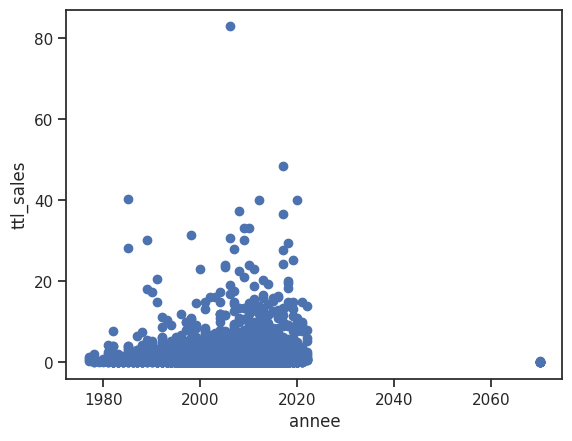

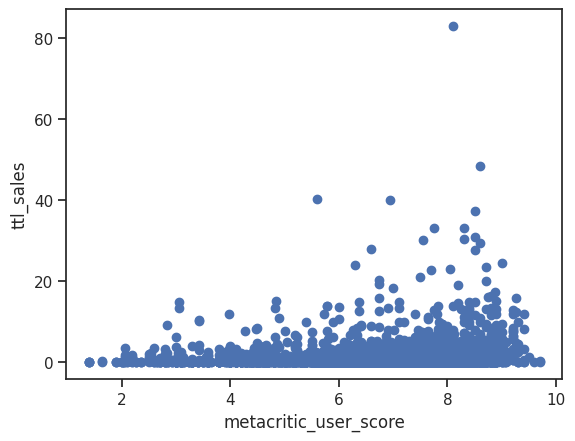

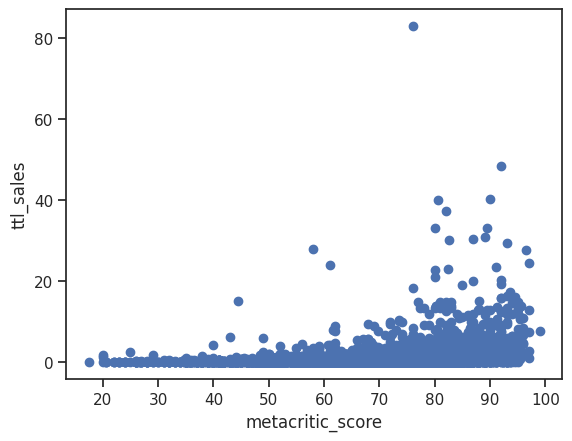

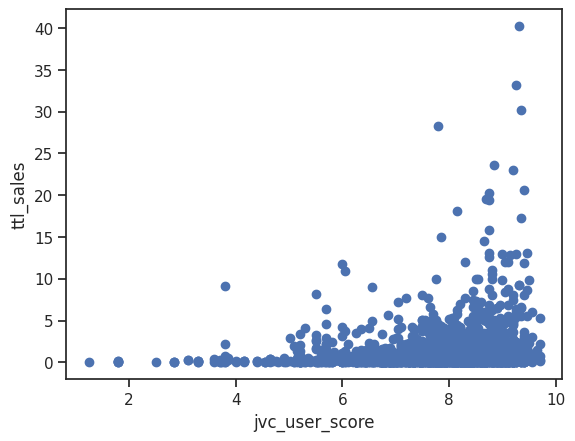

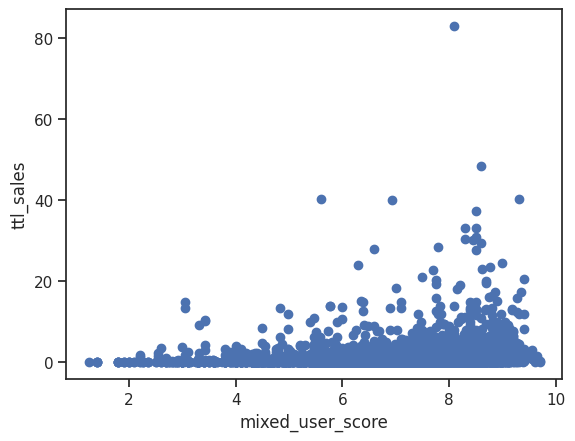

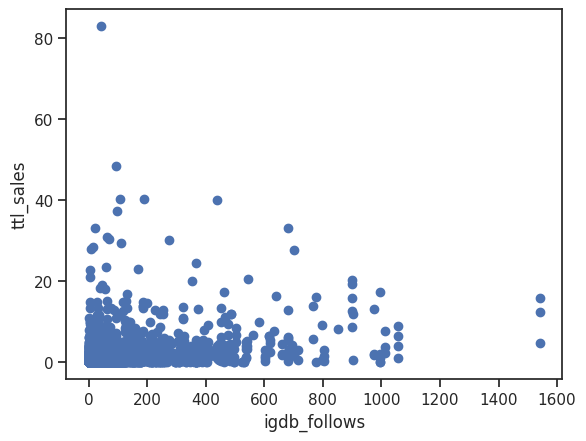

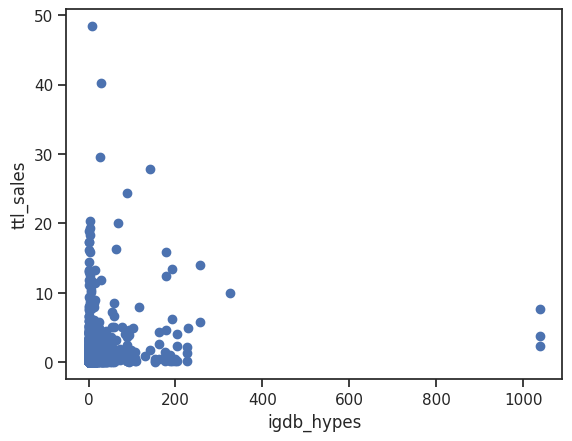

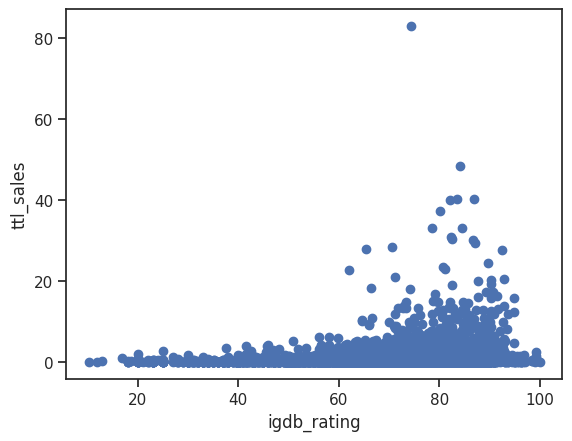

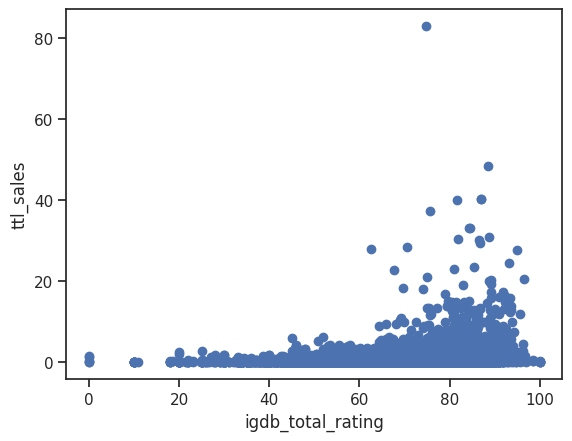

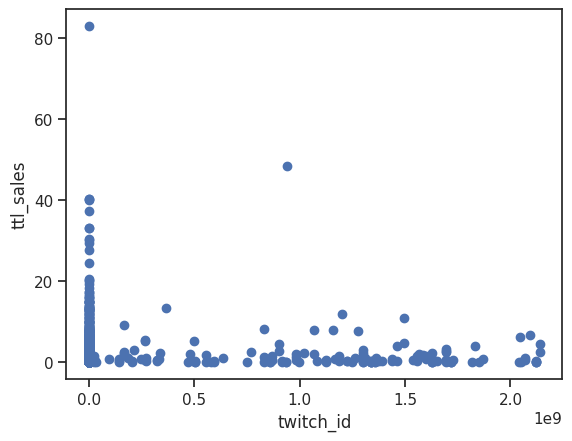

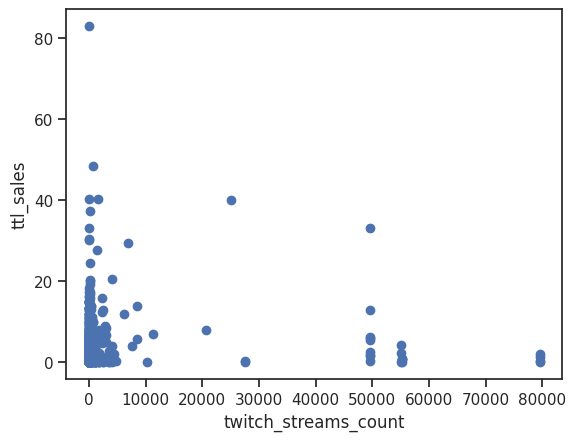

In [ ]:
#Correlation sous forme graphique 
target_col = 'ttl_sales'

# boucle sur chaque colonne du DataFrame
for col in dfr.columns:
    # vérifier si la colonne est numérique
    if dfr[col].dtype != 'object' and col != target_col:
        # tracer le graphique de dispersion
        plt.scatter(dfr[col], dfr[target_col])
        plt.xlabel(col)
        plt.ylabel(target_col)
        plt.show()

In [ ]:
#Essai travail sur un dataset "allégé"
DF=dfr.drop(['igdb_websites_url','twitch_id','twitch_streams_count','igdb_age_content_descriptions', 'igdb_url','igdb_franchise', 'igdb_hypes','jvc_summmary'], axis=1)
DF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20465 entries, 0 to 20464
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   jeu                       20465 non-null  object 
 1   Genre                     20465 non-null  object 
 2   nom_plateforme            20465 non-null  object 
 3   nom_fabricant             20465 non-null  object 
 4   editeur                   20465 non-null  object 
 5   developpeur               20463 non-null  object 
 6   annee                     19647 non-null  float64
 7   ttl_sales                 20465 non-null  float64
 8   dev_country               20459 non-null  object 
 9   metacritic_summary        9734 non-null   object 
 10  metacritic_user_score     9734 non-null   float64
 11  metacritic_score          9734 non-null   float64
 12  jvc_user_score            3252 non-null   float64
 13  jvc_url                   5167 non-null   object 
 14  mixed_

In [ ]:
#Nous mélangeons les données pour ne pas les présenter dans un ordre particulier au modèle et ne pas ajouter de biais
X = dfr.sample(frac=1, random_state=11, ignore_index=True)
X.head(3)

,jeu,Genre,nom_plateforme,nom_fabricant,editeur,developpeur,annee,ttl_sales,dev_country,metacritic_summary,...,igdb_age_rating_category,igdb_age_rating_class,igdb_developer_name,igdb_developer_country,igdb_publisher_name,igdb_publisher_country,igdb_websites_category,igdb_websites_url,twitch_id,twitch_streams_count
0,Greg Hastings' Tournament Paintball Max'd,Shooter,Playstation 2,Sony,Activision,WXP,2006.0,0.01,Unknown,Build Your Field - Design and play your own cu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Botanicula,Adventure,Microsoft Windows,PC,Amanita Design,AMANITA DESIGN,2012.0,0.33,Unknown,Botanicula is point'n'click exploration game c...,...,"PEGI, ESRB, CLASS_IND, USK","PEGI_7, ESRB_E10, CLASS_IND_12, USK_6",Amanita Design,Czechia,Amanita Design,Czechia,"steam, official, wikia, wikipedia, facebook, t...","https://store.steampowered.com/app/207690, htt...",NaN,NaN
2,Persona 3: Dancing in Moonlight,Music,Playstation 4,Sony,Atlus,ATLUS,2018.0,0.04,Japan,Choose from several difficulty levels and danc...,...,ESRB,ESRB_T,P Studio,Japan,"Atlus, Atlus USA","Japan, United States of America","official, wikia, wikipedia, twitch","https://atlus.com/personadancing/, http://mega...",NaN,NaN


In [ ]:
#création d'un masque booléen qui prend la valeur True pour toutes les lignes qui ont une valeur manquante dans la colonne "editeur"
mask1 = X.isna()["editeur"]
#création d'un masque booléen qui prend la valeur True pour toutes les lignes qui ont une valeur manquante dans la colonne "ttl_sales"
mask2 = X.isna()["ttl_sales"]
# Suppression des valeurs manquantes dans ces deux colonnes
X.dropna(subset=["editeur", "ttl_sales"], inplace=True)
#mise à jour dans Y des lignes supprimées de X
y = y[~mask1]
y = y[~mask2]

In [ ]:
!pip install dirty_cat
#représentation numérique de chaque jeu vidéos (calculée en fonction des caractéristiques du jeu : titre, description...)Nous allons utiliser un algo de traitement du langage naturel
#Ici cette fonction get_ken_embeddings va venir récupérer des donnes d'incorporation (embedding), 3 param sont passés à la fonction
from dirty_cat.datasets import get_ken_embeddings
#création d'une première table incluant les jeux et excluants les compagnies et développer spécifiés dans la chaine de caractère
embedding_games = get_ken_embeddings(
    types="game",
    exclude="companies|developer",
    embedding_table_id="games",
)

#création d'une seconde table on va inclure toutes les données contenant les "developper, plateforme, compagnie"
embedding_publisher = get_ken_embeddings(
    types="game_development_companies|game_companies|game_publish",
    embedding_table_id="games",
    suffix="_aux",
)

#on va garder que 200 données d'incorporation pour chaque table 
n_dim = 200

emb_columns = [f"X{j}" for j in range(n_dim)]

emb_columns2 = [f"X{j}_aux" for j in range(n_dim)]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 3.7 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/dirty_cat/datasets/_fetching.py:612: UserWarning: Could not find the dataset 39266678 locally. Downloading it from figshare; this might take a while... If it is interrupted, some files might be invalid/incomplete: if on the following run, the fetching raises errors, you can try fixing this issue by deleting the directory /usr/local/lib/python3.9/dist-packages/dirty_cat/datasets/data/figshare_39266678.parquet.
  info = _fetch_figshare(dataset_id, data_directory)
/usr/local/lib/python3.9/dist-packages/dirty_cat/datasets/_fetching.py:612: UserWarning: Could not find the dataset 39254360 locally. Downloading it from figshare; this might take a while... If it is interrupted, some files might be invalid/incomplete: if on the following run, the fetching raises errors, you can try fixing this issue by deleting the directory /usr/local/lib/python3.9/dist-packages/dirty_cat/datasets/data/figshare_39254360.parquet.
  info = _fetch_figshare(dataset_id, data_d

In [ ]:
#augementation des fonctionnalités des données 
from dirty_cat import FeatureAugmenter
#table embedding vecteurs représentant les jeux 
fa1 = FeatureAugmenter(tables=[(embedding_games, "Entity")], main_key="jeu")
#table embedding vecteurs représentant les éditeurs
fa2 = FeatureAugmenter(tables=[(embedding_publisher, "Entity")], main_key="editeur")

X_full = fa1.fit_transform(X)
X_full = fa2.fit_transform(X_full)

/usr/local/lib/python3.9/dist-packages/dirty_cat/_fuzzy_join.py:320: UserWarning: This feature is still experimental.
  warnings.warn("This feature is still experimental.")
/usr/local/lib/python3.9/dist-packages/dirty_cat/_fuzzy_join.py:320: UserWarning: This feature is still experimental.
  warnings.warn("This feature is still experimental.")


In [ ]:
#nous allons essayer  de prédire le montant des ventes en utilisant uniquement 
#les fonctionnalités de base contenues dans la première table 

In [ ]:
from sklearn.compose import make_column_transformer

from sklearn.preprocessing import OneHotEncoder
from dirty_cat import MinHashEncoder

min_hash = MinHashEncoder(n_components=100)
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

encoder = make_column_transformer(
    ("passthrough", ["annee"]),
    (ohe, ["Genre"]),
    (ohe, ["nom_fabricant"]),
    (ohe, ["editeur"]),
    (ohe, ["developpeur"]),
    (ohe, ["dev_country"]),
    (min_hash, ["nom_plateforme"]),
    remainder="drop",
)

In [ ]:
#on crée notre pipeline et utilisons un algo de gradient boosting (il va utiliser l'ensemble des modèles de regression pour prédire la valeur de notre variable cible)
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline

hgb = HistGradientBoostingRegressor(random_state=0)
pipeline = make_pipeline(encoder, hgb)

In [ ]:
from sklearn.model_selection import cross_validate

# Nous mettons les résultats dans des dictionnaires:
all_r2_scores = dict()
all_rmse_scores = dict()

cv_results = cross_validate(
    pipeline, X_full, y, scoring=["r2", "neg_root_mean_squared_error"]
)

all_r2_scores["Base features"] = cv_results["test_r2"]
all_rmse_scores["Base features"] = -cv_results["test_neg_root_mean_squared_error"]

print("With base features:")
print(
    f"Mean R2 is {all_r2_scores['Base features'].mean():.2f} +-"
    f" {all_r2_scores['Base features'].std():.2f} and the RMSE is"
    f" {all_rmse_scores['Base features'].mean():.2f} +-"
    f" {all_rmse_scores['Base features'].std():.2f}"
)

With base features:
Mean R2 is -13.93 +- 8.94 and the RMSE is 1.60 +- 1.02


In [ ]:
#On va créer des représentations vectorielles à partir d'info issues de wikipédia 
#Nous gardons que les colonnes des embedding 
encoder2 = make_column_transformer(
    ("passthrough",emb_columns),
   ("passthrough", emb_columns2 ),
    remainder="drop",
)

In [ ]:
#On redéfinit une pipeline :
#pour rappel : hgb = HistGradientBoostingRegressor(random_state=0)
pipeline2 = make_pipeline(encoder2, hgb)

In [ ]:
#résultats avec cross_validation 
cv_results2 = cross_validate(
    pipeline2, X_full, y, scoring=["r2", "neg_root_mean_squared_error"]
)

all_r2_scores["KEN features"] = cv_results2["test_r2"]
all_rmse_scores["KEN features"] = -cv_results2["test_neg_root_mean_squared_error"]

print("With KEN Embeddings:")
print(
    f"Mean R2 is {all_r2_scores['KEN features'].mean():.2f} +-"
    f" {all_r2_scores['KEN features'].std():.2f} and the RMSE is"
    f" {all_rmse_scores['KEN features'].mean():.2f} +-"
    f" {all_rmse_scores['KEN features'].std():.2f}"
)

With KEN Embeddings:
Mean R2 is -14.01 +- 8.96 and the RMSE is 1.60 +- 1.02


In [ ]:
#Pour les deux modèles le r2 montre que la variable cible n'est pas liée aux autres variables (le R2 doit généralement etre compris entre 0 et 1)
#L'erreur de prédiction est de 1,60 unités pour chaque valeur de la variable cible 
#avec un ecart type des mesures de précision du modèle de 1.02

In [ ]:
#Nous pouvons conclure que les résultats rapportés indiquent que le modèle basé sur les représentations vectorielles KEN ne performe pas 
#très bien, avec un R2 négatif indiquant une mauvaise performance globale, 
#et un RMSE relativement élevé indiquant une erreur moyenne importante dans les prédictions du modèle.

In [ ]:
#Prédiction finale avec toutes les variables incluses 
encoder3 = make_column_transformer(
    ("passthrough", emb_columns),
    ("passthrough", emb_columns2),
    ("passthrough", ["annee"]),
    (ohe, ["Genre"]),
    (ohe, ["nom_fabricant"]),
    (ohe, ["editeur"]),
    (ohe, ["developpeur"]),
    (ohe, ["dev_country"]),
    (min_hash, ["nom_plateforme"]),
    remainder="drop",
)

In [ ]:
#on redéfinit une pipeline 
#pour rappel : hgb = HistGradientBoostingRegressor(random_state=0)
pipeline3 = make_pipeline(encoder3, hgb)

In [ ]:
#on regarde les résultats 
cv_results3 = cross_validate(
    pipeline3, X_full, y, scoring=["r2", "neg_root_mean_squared_error"]
)

all_r2_scores["Base + KEN features"] = cv_results3["test_r2"]
all_rmse_scores["Base + KEN features"] = -cv_results3["test_neg_root_mean_squared_error"]

print("With KEN Embeddings and base features:")
print(
    f"Mean R2 is {all_r2_scores['Base + KEN features'].mean():.2f} +-"
    f" {all_r2_scores['Base + KEN features'].std():.2f} and the RMSE is"
    f" {all_rmse_scores['Base + KEN features'].mean():.2f} +-"
    f" {all_rmse_scores['Base + KEN features'].std():.2f}"
)

With KEN Embeddings and base features:
Mean R2 is -13.96 +- 8.97 and the RMSE is 1.60 +- 1.02


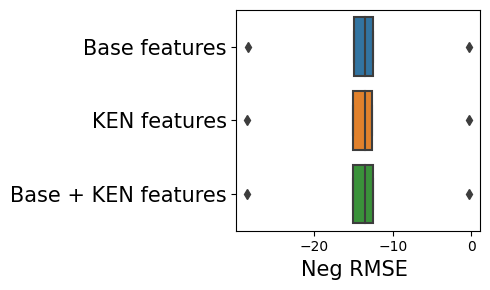

In [ ]:
#sans trop de surprise toujours aussi mauvaix : variable cibe non liées aux autres . Le modèle ne performe pas bien.
#représentation graphique des scores 
plt.figure(figsize=(5, 3))
# sphinx_gallery_thumbnail_number = -1
ax = sns.boxplot(data=pd.DataFrame(all_r2_scores), orient="h")
plt.xlabel("Neg RMSE ", size=15)
plt.yticks(size=15)
plt.tight_layout()

In [ ]:
#extraire les jeux en communs des deux datasets, nouveau dataset = intersection des jeux et je fais le plot de la valeur de l'un contre la valeur de l'autre 
#et tester le scores des jeux en commun 